#Шаг 1: Загрузка и первичный осмотр данных

In [ ]:
import seaborn as sns
import pandas as pd

# URL для загрузки датасета
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Загрузка данных
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
df = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)

# Просмотр первых нескольких строк
print(df.head())

# Информация о датасете
print(df.info())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

#Шаг 2: Устранение пропусков

In [ ]:
# Просмотр пропущенных значений по каждому столбцу
print(df.isnull().sum())

# Заполнение пропусков
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# One-Hot Encoding для категориальных признаков
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Нормализация числовых признаков
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())


        age         workclass    fnlwgt  education  education-num  \
0  0.301370         State-gov  0.044302  Bachelors       0.800000   
1  0.452055  Self-emp-not-inc  0.048238  Bachelors       0.800000   
2  0.287671           Private  0.138113    HS-grad       0.533333   
3  0.493151           Private  0.151068       11th       0.400000   
4  0.150685           Private  0.221488  Bachelors       0.800000   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0       0.02174           0.0        0.397959  United-States  <=50K  


##Шаг 2: Визуализация взаимосвязей и распределений
Визуализация соотношения между возрастом, полом и доходом

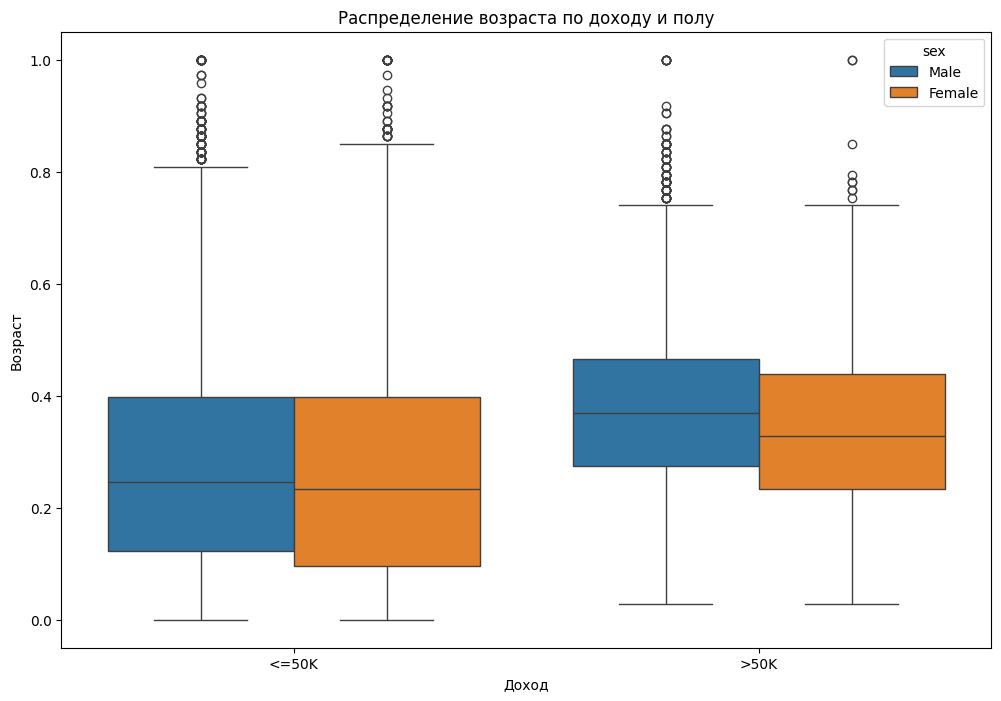

In [ ]:
# Создание графика с распределением возраста по доходу и полу
plt.figure(figsize=(12, 8))
sns.boxplot(x="income", y="age", hue="sex", data=df)
plt.title('Распределение возраста по доходу и полу')
plt.xlabel('Доход')
plt.ylabel('Возраст')
plt.show()

##Визуализация связи образования с рабочим классом и доходом

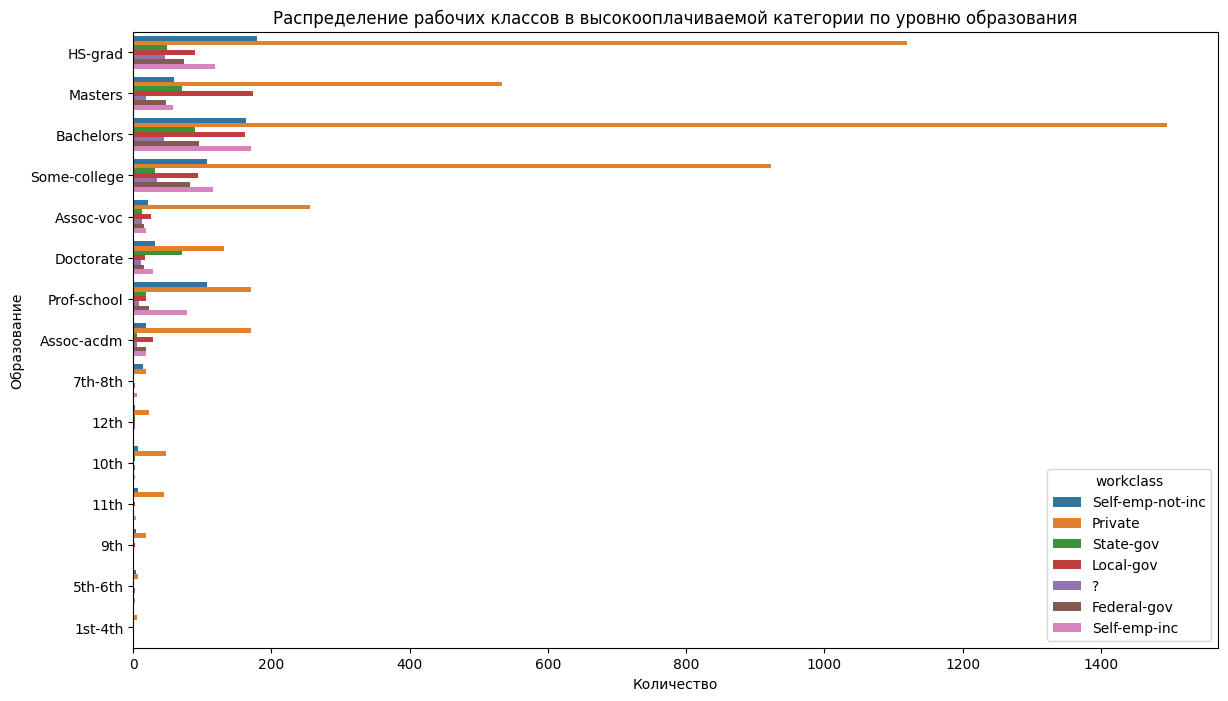

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(y="education", hue="workclass", data=df[df['income'] == '>50K'])
plt.title('Распределение рабочих классов в высокооплачиваемой категории по уровню образования')
plt.xlabel('Количество')
plt.ylabel('Образование')
plt.show()

##Визуализация влияния рабочего времени на доход

count    32561.000000
mean         0.402423
std          0.125994
min          0.000000
25%          0.397959
50%          0.397959
75%          0.448980
max          1.000000
Name: hours-per-week, dtype: float64


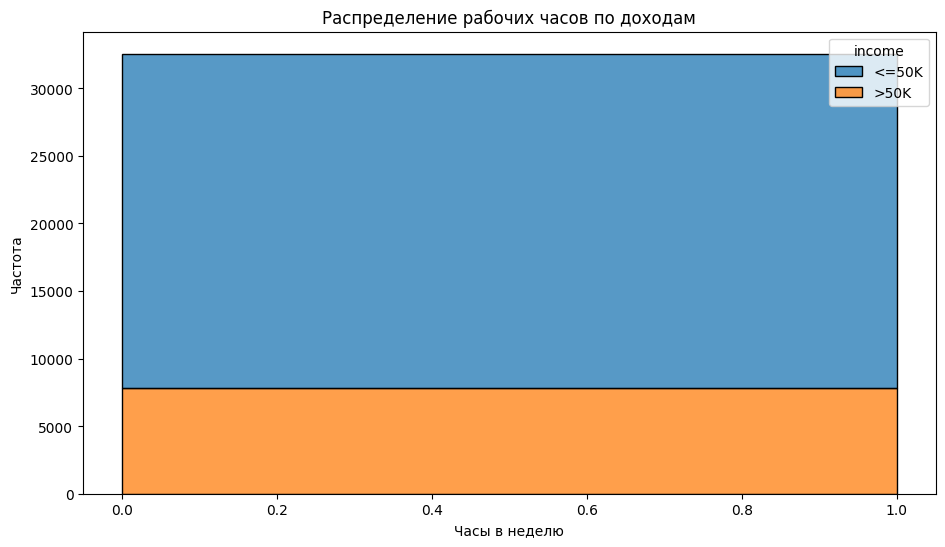

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка, что DataFrame содержит нужный столбец и он не пустой
print(df['hours-per-week'].describe())

# Гистограмма распределения рабочих часов по доходам
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='hours-per-week', hue='income', multiple="stack", binwidth=1)  # Использование более малого и явного значения для binwidth
plt.title('Распределение рабочих часов по доходам')
plt.xlabel('Часы в неделю')
plt.ylabel('Частота')
plt.show()

##Корреляционный анализ числовых признаков

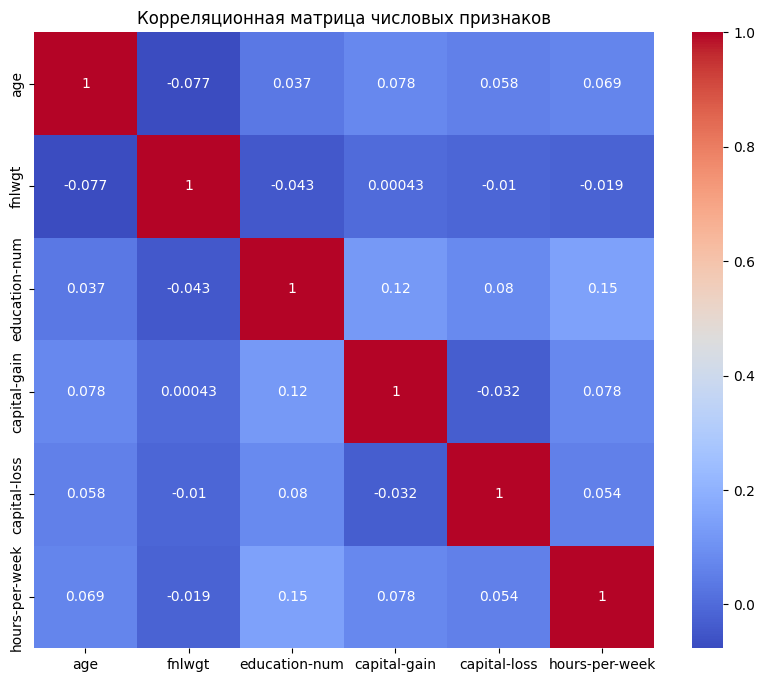

In [ ]:
# Корреляционная матрица числовых признаков
correlation = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

#Шаг 3: Многомерный анализ
##Связь образования, возраста и дохода

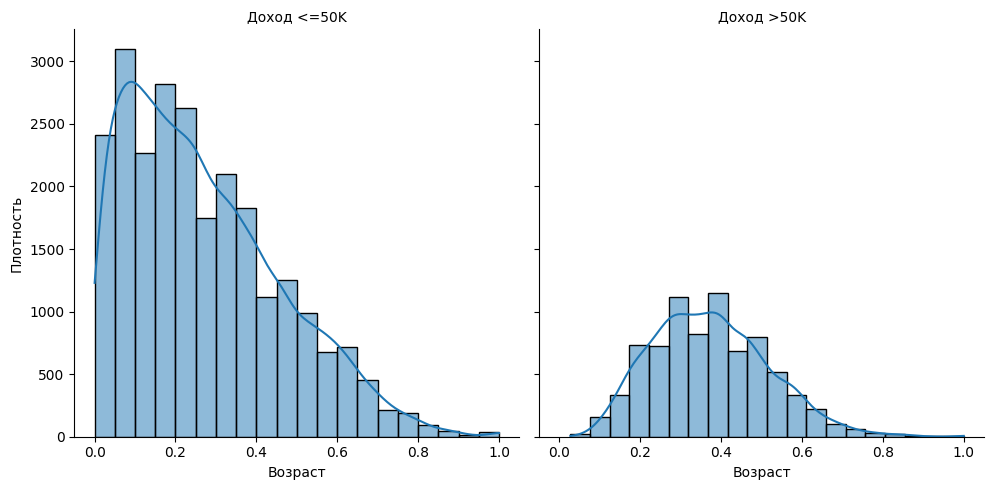

In [ ]:
# Столбчатая диаграмма с возрастом и образованием как факторами дохода
g = sns.FacetGrid(df, col="income", height=5)
g.map_dataframe(sns.histplot, "age", kde=True, bins=20)
g.set_titles("Доход {col_name}")
g.set_axis_labels("Возраст", "Плотность")
g.add_legend()
plt.show()

##Влияние семейного положения на доход в разных профессиях

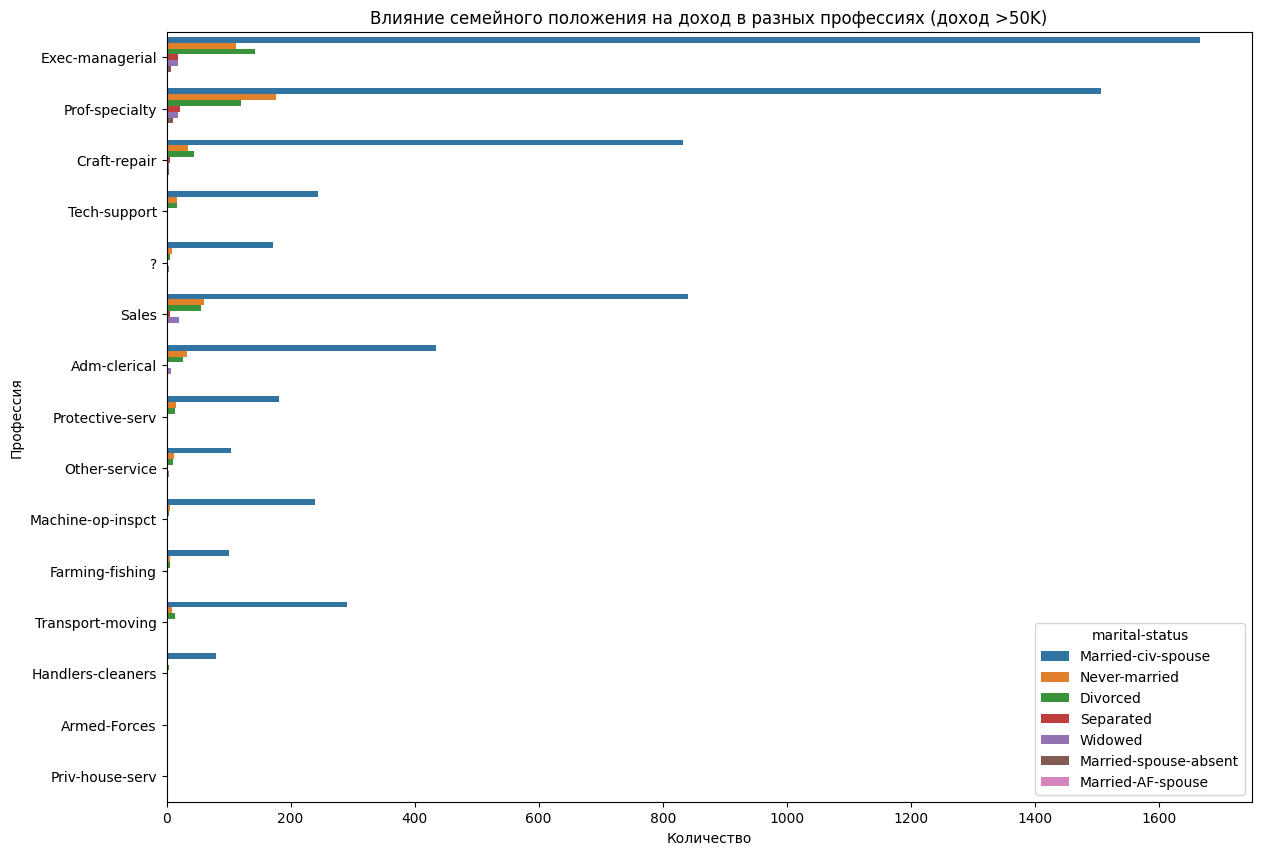

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(y="occupation", hue="marital-status", data=df[df['income'] == '>50K'])
plt.title('Влияние семейного положения на доход в разных профессиях (доход >50K)')
plt.xlabel('Количество')
plt.ylabel('Профессия')
plt.show()

##Построение парных отношений между числовыми переменными
Можно использовать pairplot для визуализации отношений между всеми числовыми переменными с раскраской по уровню дохода. Это поможет увидеть распределения и корреляции в одном месте.

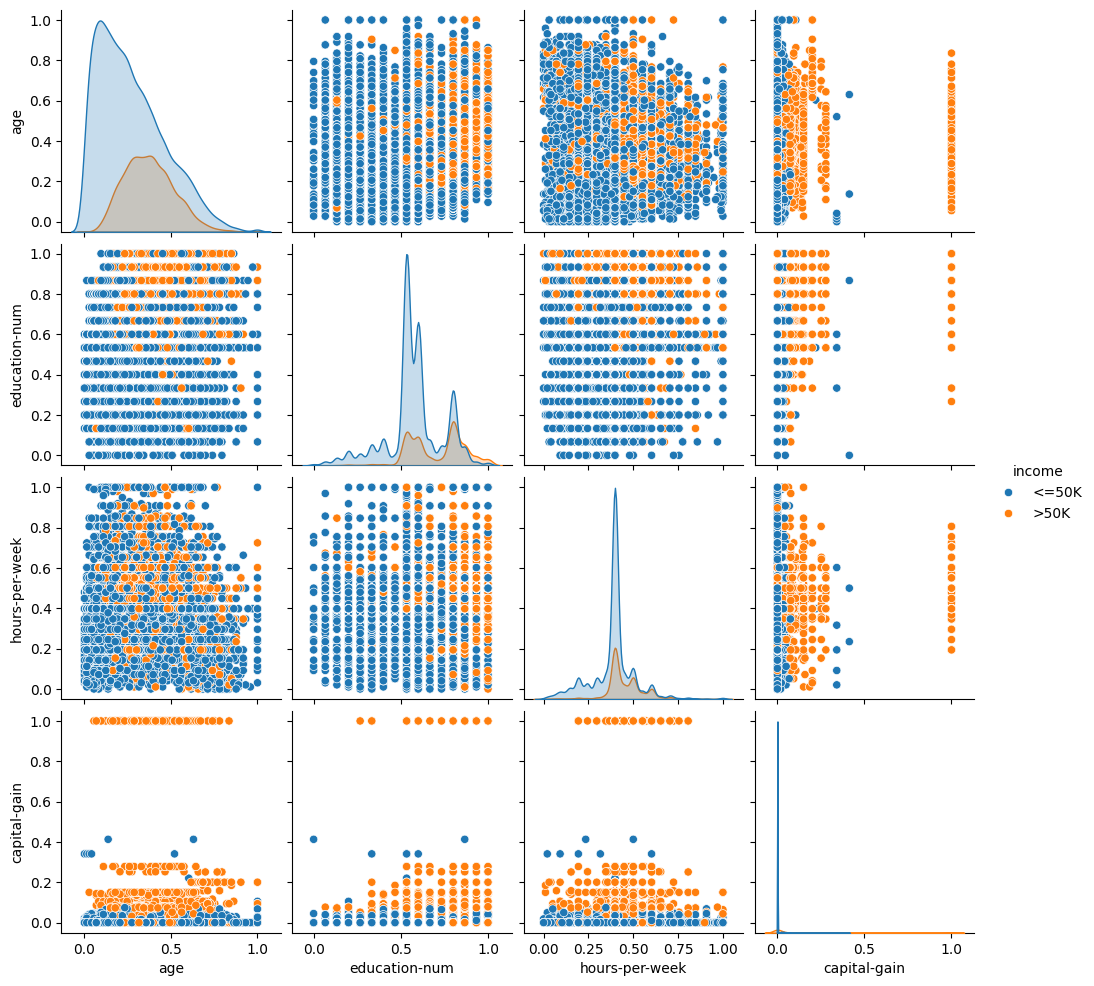

In [ ]:
sns.pairplot(df, hue='income', vars=['age', 'education-num', 'hours-per-week', 'capital-gain'])
plt.show()


##Визуализация влияния страны происхождения на доход
Рассмотрение распределения доходов в зависимости от страны может выявить культурные или экономические тенденции.

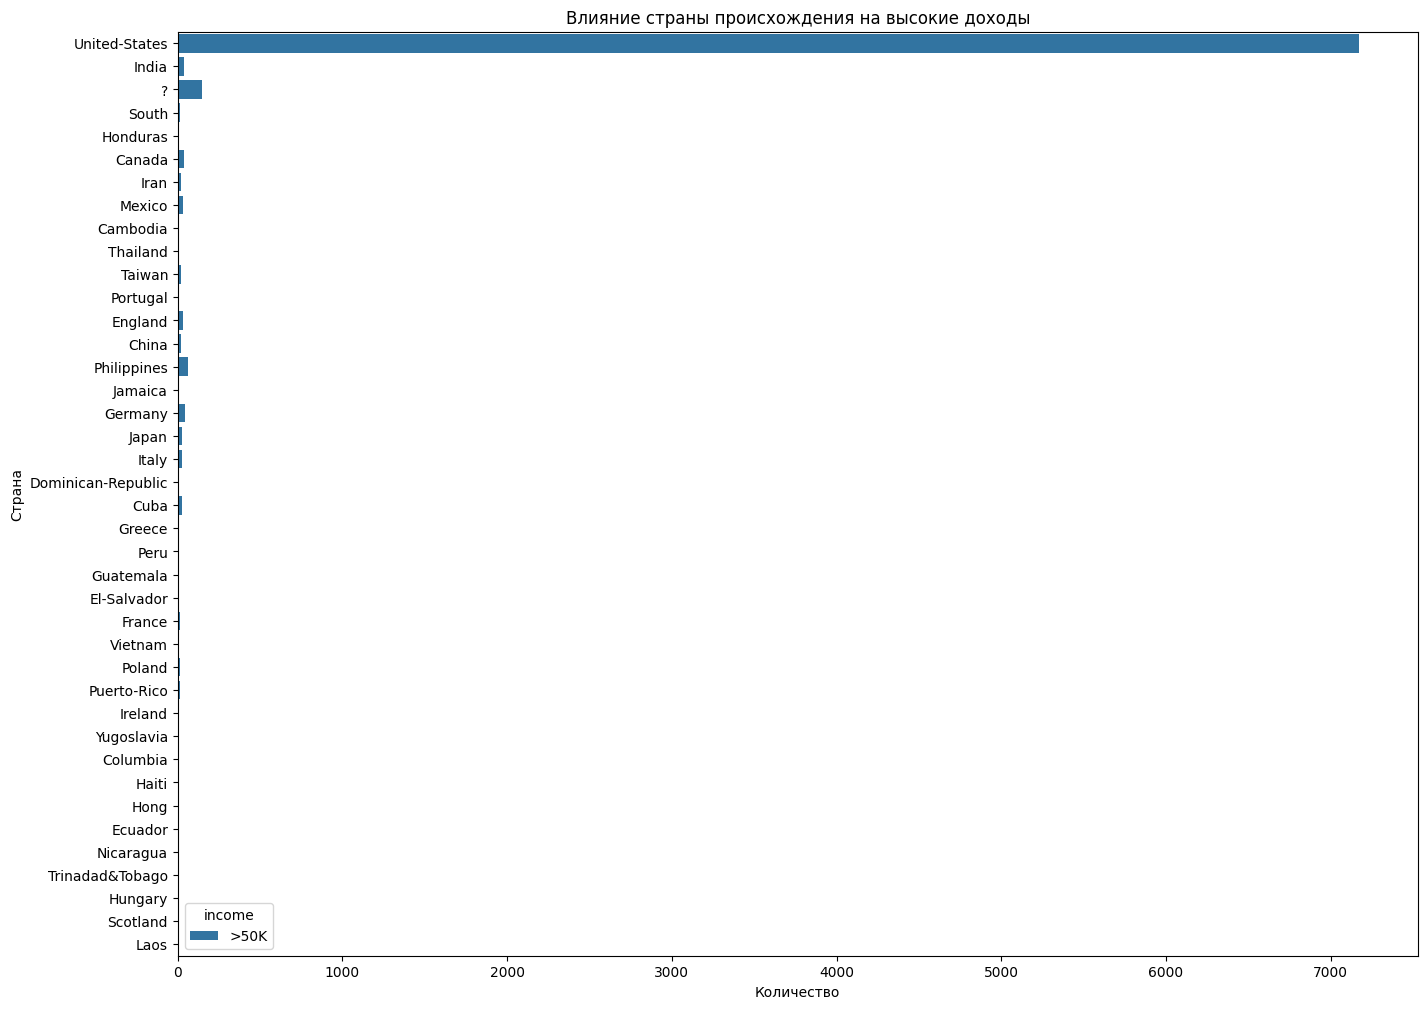

In [ ]:
plt.figure(figsize=(16, 12))
sns.countplot(y='native-country', hue='income', data=df[df['income'] == '>50K'])
plt.title('Влияние страны происхождения на высокие доходы')
plt.xlabel('Количество')
plt.ylabel('Страна')
plt.show()
